In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



In [3]:
data = pd.read_csv('../Datasets/fire_archive_NEW.csv')
print(data.shape)
for i in range(len(data)): 
    data.loc[i,'Day'] = int(data.loc[i,'acq_date'].split('-')[0])
    data.loc[i,'Month'] = int(data.loc[i,'acq_date'].split('-')[1])
    data.loc[i,'Year'] = int(data.loc[i,'acq_date'].split('-')[2])
#print(data['Day'][0])
#print(data['Month'][0])
#print(data['Year'][0])
#print(data.head())
print(data.shape)
data.head()
# data.tail()

c:\users\soumya agarwal\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(117151, 14)
(117151, 17)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,Day,Month,Year
0,30.0915,79.5024,304.5,1.2,1.1,01-01-2016,517,Terra,MODIS,58,6.2,285.8,8.7,D,1.0,1.0,2016.0
1,31.3276,77.0032,305.0,1.8,1.3,01-01-2016,517,Terra,MODIS,49,6.2,292.2,16.1,D,1.0,1.0,2016.0
2,29.8570,80.6228,304.0,1.1,1.0,01-01-2016,518,Terra,MODIS,49,6.2,285.2,9.0,D,1.0,1.0,2016.0
3,29.9037,80.4531,344.4,1.1,1.1,01-01-2016,518,Terra,MODIS,94,6.2,289.8,60.2,D,1.0,1.0,2016.0
4,29.8945,80.4499,325.8,1.1,1.1,01-01-2016,518,Terra,MODIS,84,6.2,290.4,27.9,D,1.0,1.0,2016.0


In [4]:
data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,Day,Month,Year
count,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000
mean,30.840989,74.985125,321.144938,1.361651,1.133238,797.157284,62.696119,302.248435,17.529912,15.918661,8.105172,2017.343727
std,0.996430,1.684402,10.726505,0.559207,0.183640,234.582792,16.458130,7.372490,18.399463,9.326866,3.274789,1.110870
min,29.400000,70.800100,300.000000,1.000000,1.000000,440.000000,0.000000,266.700000,2.100000,1.000000,1.000000,2016.000000
25%,30.149700,74.318000,313.800000,1.000000,1.000000,747.000000,53.000000,298.500000,8.100000,8.000000,5.000000,2016.000000
50%,30.607000,75.078100,319.000000,1.100000,1.100000,811.000000,65.000000,301.400000,12.500000,16.000000,10.000000,2017.000000
75%,31.325900,75.822000,328.300000,1.500000,1.200000,824.000000,74.000000,305.100000,20.400000,25.000000,11.000000,2018.000000
max,35.799500,80.699600,427.700000,4.800000,2.000000,2159.000000,100.000000,331.700000,1104.700000,31.000000,12.000000,2019.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117151 entries, 0 to 117150
Data columns (total 17 columns):
latitude      117151 non-null float64
longitude     117151 non-null float64
brightness    117151 non-null float64
scan          117151 non-null float64
track         117151 non-null float64
acq_date      117151 non-null object
acq_time      117151 non-null int64
satellite     117151 non-null object
instrument    117151 non-null object
confidence    117151 non-null int64
version       117151 non-null object
bright_t31    117151 non-null float64
frp           117151 non-null float64
daynight      117151 non-null object
Day           117151 non-null float64
Month         117151 non-null float64
Year          117151 non-null float64
dtypes: float64(10), int64(2), object(5)
memory usage: 15.2+ MB


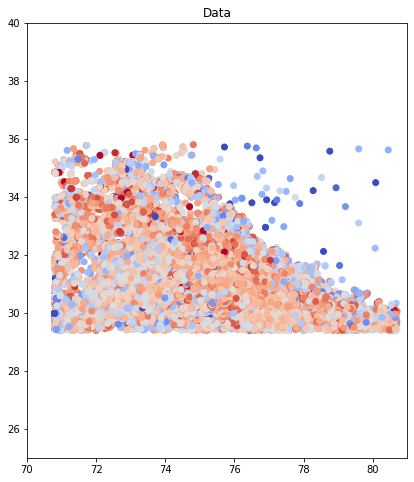

In [6]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(1,2,2)
ax.set_title("Data")

ax.set_autoscaley_on(False)
ax.set_ylim([25, 40])
ax.set_autoscalex_on(False)
ax.set_xlim([70, 81])
plt.scatter(data["longitude"],
            data["latitude"],
            cmap="coolwarm",
            c=data["confidence"] / data["confidence"].max())
_ = plt.plot()

In [7]:
brightness = data['brightness']
brightness_31=data['bright_t31']
month =data['Month']
confidence=data['confidence']
power=data['frp']
print(brightness.shape)
print(brightness_31.shape)
print(month.shape)
print(confidence.shape)

(117151,)
(117151,)
(117151,)
(117151,)


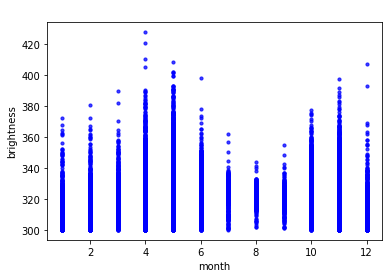

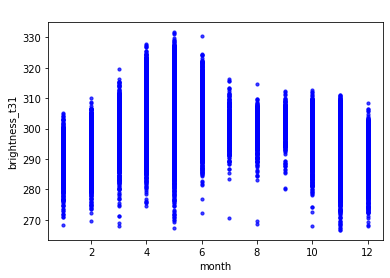

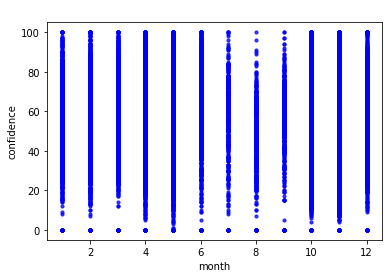

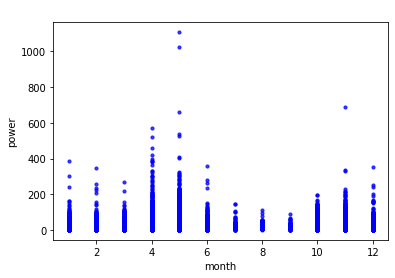

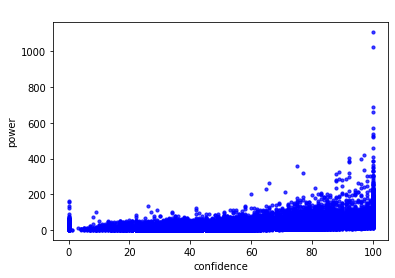

In [8]:
def scatterplot(y2,y1,x_label=" ",y_label=" ",title=" ",color="b",yscale_log=False):
    _, ax=plt.subplots()
    ax.scatter(y2,y1,s=10, color = color, alpha=0.75)
    
    if yscale_log==True:
        ax.set_yscale('log')
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

scatterplot(month,brightness,'month','brightness')
scatterplot(month,brightness_31,'month','brightness_t31')
scatterplot(month,confidence,'month','confidence')
scatterplot(month,power,'month','power')
scatterplot(confidence,power,'confidence','power')

In [9]:
Aggregation={'latitude':'mean','longitude':'mean','brightness':'mean','scan':'mean','track':'mean','acq_time':'mean','confidence':'mean','bright_t31':'mean','frp':'mean'}
data_daywise=pd.DataFrame()
data_daywise=data.groupby(['Year','Month','Day','acq_date']).agg(Aggregation).reset_index()
data_daywise.head()



,Year,Month,Day,acq_date,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
0,2016.0,1.0,1.0,01-01-2016,31.258585,73.542217,310.346341,1.114634,1.046341,821.512195,59.609756,293.568293,10.341463
1,2016.0,1.0,2.0,02-01-2016,31.108153,72.678637,306.000000,1.313333,1.103333,710.366667,58.300000,287.846667,13.253333
2,2016.0,1.0,3.0,03-01-2016,31.202693,75.962917,308.843103,1.222414,1.084483,807.017241,58.500000,291.356897,12.436207
3,2016.0,1.0,4.0,04-01-2016,30.361394,72.666141,307.347059,1.476471,1.205882,610.411765,56.764706,288.376471,13.805882
4,2016.0,1.0,5.0,05-01-2016,30.755435,76.612978,307.998039,1.219608,1.066667,795.039216,60.450980,293.150980,9.107843


In [10]:
date=data_daywise['acq_date']

In [11]:
data_daywise.shape

(1313, 13)

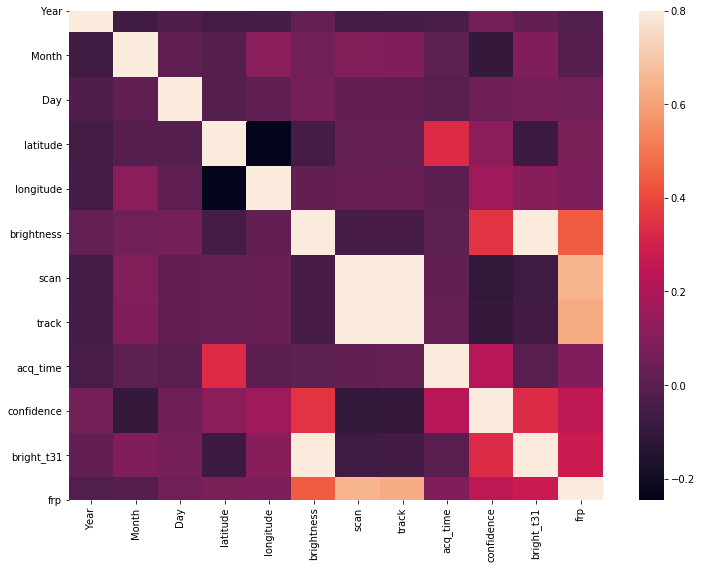

,Year,Month,Day,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
Year,1.000000,-0.067434,-0.026257,-0.061598,-0.053438,0.027010,-0.056538,-0.050659,-0.042637,0.066232,0.020966,-0.022185
Month,-0.067434,1.000000,0.015661,-0.011074,0.115621,0.060372,0.100471,0.092556,0.009647,-0.100736,0.092701,-0.009617
Day,-0.026257,0.015661,1.000000,-0.016671,0.014896,0.066856,0.020842,0.020586,-0.006294,0.045442,0.070285,0.053957
latitude,-0.061598,-0.011074,-0.016671,1.000000,-0.245562,-0.054200,0.026276,0.026571,0.329439,0.118415,-0.079626,0.084237
longitude,-0.053438,0.115621,0.014896,-0.245562,1.000000,0.022473,0.033425,0.036269,0.007580,0.169849,0.110385,0.089269
brightness,0.027010,0.060372,0.066856,-0.054200,0.022473,1.000000,-0.048375,-0.047845,0.009776,0.354399,0.868278,0.441237
scan,-0.056538,0.100471,0.020842,0.026276,0.033425,-0.048375,1.000000,0.980460,0.017238,-0.108603,-0.070818,0.650943
track,-0.050659,0.092556,0.020586,0.026571,0.036269,-0.047845,0.980460,1.000000,0.025649,-0.102193,-0.061993,0.626615
acq_time,-0.042637,0.009647,-0.006294,0.329439,0.007580,0.009776,0.017238,0.025649,1.000000,0.227890,-0.005531,0.089741
confidence,0.066232,-0.100736,0.045442,0.118415,0.169849,0.354399,-0.108603,-0.102193,0.227890,1.000000,0.330494,0.245407


In [12]:
cormat=data_daywise.corr()
fig=plt.figure(figsize =(13,9))
sns.heatmap(cormat,vmax=.8,square=True)
plt.show()
cormat

In [13]:
data_copy=data_daywise[['latitude','longitude','brightness'  ,'scan' , 'track','acq_time','confidence', 'bright_t31'  , 'frp' ,'Day' , 'Month','Year']]
data_copy.head()


,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,Day,Month,Year
0,31.258585,73.542217,310.346341,1.114634,1.046341,821.512195,59.609756,293.568293,10.341463,1.0,1.0,2016.0
1,31.108153,72.678637,306.000000,1.313333,1.103333,710.366667,58.300000,287.846667,13.253333,2.0,1.0,2016.0
2,31.202693,75.962917,308.843103,1.222414,1.084483,807.017241,58.500000,291.356897,12.436207,3.0,1.0,2016.0
3,30.361394,72.666141,307.347059,1.476471,1.205882,610.411765,56.764706,288.376471,13.805882,4.0,1.0,2016.0
4,30.755435,76.612978,307.998039,1.219608,1.066667,795.039216,60.450980,293.150980,9.107843,5.0,1.0,2016.0


In [14]:
columns = np.full((cormat.shape[0],), True, dtype=bool)
for i in range(cormat.shape[0]):
    for j in range(i+1, cormat.shape[0]):
        if cormat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
 

print(columns)

[ True  True  True  True  True  True  True False  True  True  True  True]


In [15]:
selected_columns = ['latitude','longitude','brightness'  ,'scan' , 'acq_time','confidence', 'bright_t31'  , 'frp' ,'Day' , 'Month','Year']

data_final = data_copy[['latitude','longitude','brightness'  ,'scan' , 'acq_time','confidence', 'bright_t31'  , 'frp' ,'Day' , 'Month','Year']]

data_final['acq_date']=date

data_final.head()

,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,Day,Month,Year,acq_date
0,31.258585,73.542217,310.346341,1.114634,821.512195,59.609756,293.568293,10.341463,1.0,1.0,2016.0,01-01-2016
1,31.108153,72.678637,306.000000,1.313333,710.366667,58.300000,287.846667,13.253333,2.0,1.0,2016.0,02-01-2016
2,31.202693,75.962917,308.843103,1.222414,807.017241,58.500000,291.356897,12.436207,3.0,1.0,2016.0,03-01-2016
3,30.361394,72.666141,307.347059,1.476471,610.411765,56.764706,288.376471,13.805882,4.0,1.0,2016.0,04-01-2016
4,30.755435,76.612978,307.998039,1.219608,795.039216,60.450980,293.150980,9.107843,5.0,1.0,2016.0,05-01-2016


In [16]:
l=list(selected_columns)
l.remove('confidence')
features=data[l]
print(features.head())
target = pd.DataFrame()
target=data[['confidence']]
print(target.head())
target.describe()

   latitude  longitude  brightness  scan  acq_time  bright_t31   frp  Day  \
0   30.0915    79.5024       304.5   1.2       517       285.8   8.7  1.0   
1   31.3276    77.0032       305.0   1.8       517       292.2  16.1  1.0   
2   29.8570    80.6228       304.0   1.1       518       285.2   9.0  1.0   
3   29.9037    80.4531       344.4   1.1       518       289.8  60.2  1.0   
4   29.8945    80.4499       325.8   1.1       518       290.4  27.9  1.0   

   Month    Year  
0    1.0  2016.0  
1    1.0  2016.0  
2    1.0  2016.0  
3    1.0  2016.0  
4    1.0  2016.0  
   confidence
0          58
1          49
2          49
3          94
4          84


,confidence
count,117151.000000
mean,62.696119
std,16.458130
min,0.000000
25%,53.000000
50%,65.000000
75%,74.000000
max,100.000000


In [17]:
for i in target.index:
    if target['confidence'][i]<=40:
        target.at[i, 'confidence'] = 0
    elif target['confidence'][i]<=65:
        target.at[i, 'confidence'] = 1
    else:
        target.at[i, 'confidence'] = 2

In [18]:
target['confidence']
target.describe()

,confidence
count,117151.000000
mean,1.371102
std,0.661220
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


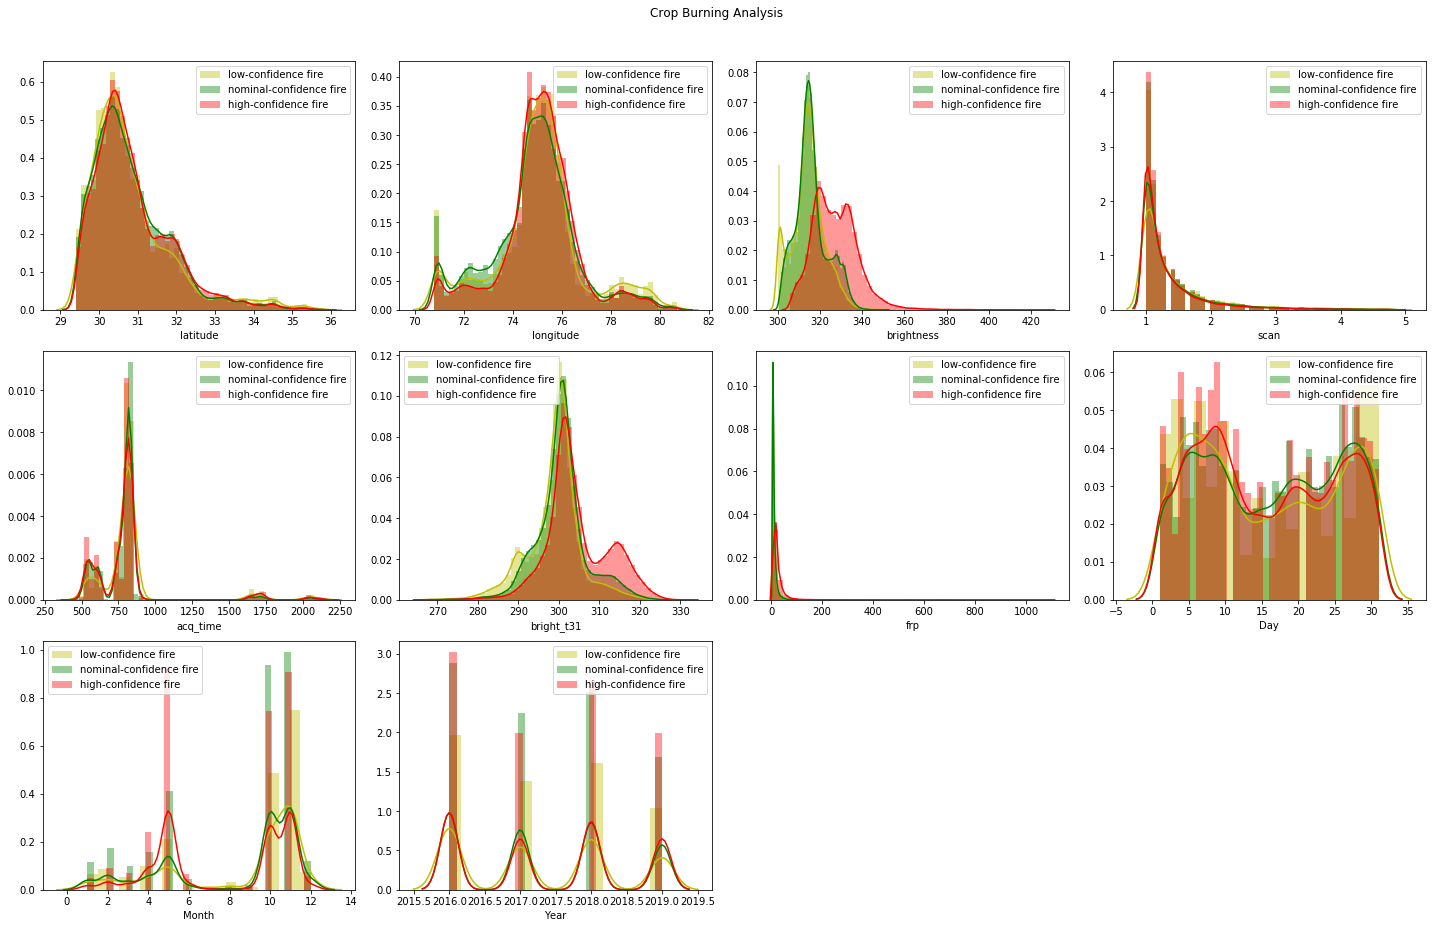

In [19]:
# type(features['version'][0])

fig = plt.figure(figsize = (20, 25))
j = 0
for i in features.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(features[i][target['confidence']==0], color='y', label = 'low-confidence fire')
    sns.distplot(features[i][target['confidence']==1], color='g', label = 'nominal-confidence fire')
    sns.distplot(features[i][target['confidence']==2], color='r', label = 'high-confidence fire')
    plt.legend(loc='best')
fig.suptitle('Crop Burning Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [20]:
data_final.to_pickle("fire_data.pkl")

In [21]:
fire_data = pd.read_pickle("fire_data.pkl")

In [22]:
fire_data.head()


,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,Day,Month,Year,acq_date
0,31.258585,73.542217,310.346341,1.114634,821.512195,59.609756,293.568293,10.341463,1.0,1.0,2016.0,01-01-2016
1,31.108153,72.678637,306.000000,1.313333,710.366667,58.300000,287.846667,13.253333,2.0,1.0,2016.0,02-01-2016
2,31.202693,75.962917,308.843103,1.222414,807.017241,58.500000,291.356897,12.436207,3.0,1.0,2016.0,03-01-2016
3,30.361394,72.666141,307.347059,1.476471,610.411765,56.764706,288.376471,13.805882,4.0,1.0,2016.0,04-01-2016
4,30.755435,76.612978,307.998039,1.219608,795.039216,60.450980,293.150980,9.107843,5.0,1.0,2016.0,05-01-2016
